In [ ]:
!pip install pennylane

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.3 MB/s eta 0:00:00


**Codercise I.1.1.** Suppose we are given an unnormalized quantum state

$|\psi>=\alpha |0> + \beta|1>,|\alpha|^{2} + |\beta|^{2} \ne 1$

We can turn this into an equivalent, valid quantum state by normalizing it. Write a function that, given  and , normalizes this state to

$$|\psi'>=\alpha' |0> + \beta'|1>,|\alpha'|^{2} + |\beta'|^{2} = 1$$

In [ ]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt


In [ ]:


ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

def normalize_state(alpha, beta):
    """Compute a normalized quantum state given arbitrary amplitudes.

    Args:
        alpha (complex): The amplitude associated with the |0> state.
        beta (complex): The amplitude associated with the |1> state.

    Returns:
        array[complex]: A vector (numpy array) with 2 elements that represents
        a normalized quantum state.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A VECTOR [a', b'] BASED ON alpha AND beta SUCH THAT |a'|^2 + |b'|^2 = 1
    a = alpha/np.sqrt(alpha*alpha.conjugate() + beta*beta.conjugate())
    b = beta/np.sqrt(alpha*alpha.conjugate() + beta*beta.conjugate())
    psi = a*ket_0 + b*ket_1
    # RETURN A VECTOR
    return psi, a, b

In [ ]:
psi,a,b = normalize_state(2+1j, 5-1j)

print(a)
print(f'psi: {psi}')
print(abs(psi[0]))
print(abs(psi[1]))
print(abs(psi[0]*psi[0].conjugate()+psi[1]*psi[1].conjugate()))

(0.3592106040535498+0.1796053020267749j)
psi: [0.3592106 +0.1796053j 0.89802651-0.1796053j]
0.40160966445124946
0.9158109397792511
1.0000000000000002


**Codercise I.1.2** Write a function to compute the inner product between two arbitrary states. Then, use it to verify that $|0>$ and $|0>$ form an orthonormal basis, i.e., the states are normalized and orthogonal.

In [ ]:
state_1 = np.array([0.8, 0.6])
state_2 = np.array([1 / np.sqrt(2), 1j / np.sqrt(2)])

def inner_product(state_1, state_2):
    """Compute the inner product between two states.

    Args:
        state_1 (array[complex]): A normalized quantum state vector
        state_2 (array[complex]): A second normalized quantum state vector

    Returns:
        complex: The value of the inner product <state_1 | state_2>.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # COMPUTE AND RETURN THE INNER PRODUCT



    return state_1.conjugate().transpose().dot(state_2)


# Test your results with this code
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

print(f"<0|0> = {inner_product(ket_0, ket_0)}")
print(f"<0|1> = {inner_product(ket_0, ket_1)}")
print(f"<1|0> = {inner_product(ket_1, ket_0)}")
print(f"<1|1> = {inner_product(ket_1, ket_1)}")

print(f"<state_2|state_1> = {inner_product(state_2, state_1)}")
print(f"<state_2|state_1> = {np.sqrt(inner_product(state_2, state_1)*inner_product(state_2, state_1).conjugate())}")


<0|0> = 1
<0|1> = 0
<1|0> = 0
<1|1> = 1
<state_2|state_1> = (0.565685424949238-0.42426406871192845j)
<state_2|state_1> = (0.7071067811865475+0j)


**Codercise I.1.3.** The function below takes a quantum state vector as input. Complete the function to simulate the outcomes of an arbitrary number of quantum measurements, i.e., return a list of samples  or  based on the probabilities given by the input state. \\

The function np.random.choice will be helpful here: https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

In [ ]:
state = np.array([0.8+0.j, 0.6+0.j])

def measure_state(state, num_meas):
    """Simulate a quantum measurement process.

    Args:
        state (array[complex]): A normalized qubit state vector.
        num_meas (int): The number of measurements to take

    Returns:
        array[int]: A set of num_meas samples, 0 or 1, chosen according to the probability
        distribution defined by the input state.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # COMPUTE THE MEASUREMENT OUTCOME PROBABILITIES
    alpha_2 = state[0].conjugate()*state[0]
    beta_2 = state[1].conjugate()*state[1]
    meas_dist = np.random.choice(2,num_meas,p=[alpha_2.real,beta_2.real])
    # RETURN A LIST OF SAMPLE MEASUREMENT OUTCOMES

    return meas_dist

In [ ]:
print(measure_state(state, 10))
sum(measure_state(state, 10))

[1 0 0 0 0 0 0 0 0 0]


tensor(4, requires_grad=True)

**Codercise I.1.4.** Complete the function below to apply the provided quantum operation U to an input state.

In [ ]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

def apply_u(state,U):
    """Apply a quantum operation.

    Args:
        state (array[complex]): A normalized quantum state vector.

    Returns:
        array[complex]: The output state after applying U.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY U TO THE INPUT STATE AND RETURN THE NEW STATE
    new_state = U.dot(state)
    return new_state

In [ ]:
state = np.array([1+2j,1-4j])

print(state)
print(apply_u(state,U))

[1.+2.j 1.-4.j]
[1.41421356-1.41421356j 0.        +4.24264069j]


**Codercise I.1.5.** Use the functions below to simulate a quantum algorithm that does the following:

Initialize a qubit in state
Apply the provided operation U
Simulate measuring the output state 100 times
You'll have to complete a function for initialization, but we've provided functions for the other two.

In [ ]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

def initialize_state():
    """Prepare a qubit in state |0>.

    Returns:
        array[float]: the vector representation of state |0>.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE THE STATE |0>
    return np.array([1,0])


def apply_u(state):
    """Apply a quantum operation."""
    return np.dot(U, state)


def measure_state(state, num_meas):
    """Measure a quantum state num_meas times."""
    p_alpha = np.abs(state[0]) ** 2
    p_beta = np.abs(state[1]) ** 2
    print(p_alpha,p_beta)
    meas_outcome = np.random.choice([0,1], p=[p_alpha, p_beta], size=num_meas)
    return meas_outcome


def quantum_algorithm():
    """Use the functions above to implement the quantum algorithm described above.

    Try and do so using three lines of code or less!

    Returns:
        array[int]: the measurement results after running the algorithm 100 times
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE THE STATE, APPLY U, THEN TAKE 100 MEASUREMENT SAMPLES
    state = initialize_state()
    state = apply_u(state)
    ms = measure_state(state, 100)
    return ms


In [ ]:
resp = quantum_algorithm()
print(resp)
print(sum(resp))

0.4999999999999999 0.4999999999999999
[0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0
 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1]
54


In [ ]:
dev = qml.device("default.qubit", wires=3)
# U para 10
U = np.array([[1,0,0,0,0,0,0,0],
              [0,1,0,0,0,0,0,0],
              [0,0,1,0,0,0,0,0],
              [0,0,0,1,0,0,0,0],
              [0,0,0,0,0,1,0,0],
              [0,0,0,0,1,0,0,0],
              [0,0,0,0,0,0,1,0],
              [0,0,0,0,0,0,0,1]
              ])


def my_circuit():
    ##################
    # YOUR CODE HERE #
    ##################

    # REORDER THESE 5 GATES TO MATCH THE CIRCUIT IN THE PICTURE


    #qml.Hadamard(wires=0)
    qml.PauliX(wires=2)
    qml.Hadamard(wires=2)
    qml.QubitUnitary(U, wires=[0,1,2])
    #qml.CNOT(wires=[0, 1])

    # This is the measurement; we return the probabilities of all possible output states
    # You'll learn more about what types of measurements are available in a later node

    return qml.probs(wires=[0, 1])


#cria um nó para conecter o dispositivo ao circuito criado
my_qnode = qml.QNode(my_circuit, dev)

print(my_qnode())

[1. 0. 0. 0.]


**Codercise I.2.1.** The code below is a quantum function with all the gates from the above circuit (which we reproduce here for convenience). However, the gates are out of order! Re-arrange the lines of the function to match the order of operations in the circuit.
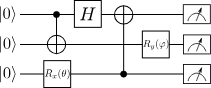

In [ ]:
dev = qml.device("default.qubit", wires=3)

def my_circuit(theta, phi):
    ##################
    # YOUR CODE HERE #
    ##################

    # REORDER THESE 5 GATES TO MATCH THE CIRCUIT IN THE PICTURE

    qml.CNOT(wires=[0, 1])
    qml.Hadamard(wires=0)
    qml.RX(theta, wires=2)
    qml.CNOT(wires=[2, 0])
    qml.RY(phi, wires=1)

    # This is the measurement; we return the probabilities of all possible output states
    # You'll learn more about what types of measurements are available in a later node
    return qml.probs(wires=[0, 1, 2])

#varios valores para theta e phi de 0 a 2*pi
theta = np.linspace(0, 2*np.pi, num=3)
phi = np.linspace(0, 2*np.pi, num=3)

#cria um nó para conecter o dispositivo ao circuito criado
my_qnode = qml.QNode(my_circuit, dev)

print(my_qnode(theta,phi)[0])
print(my_qnode(theta,phi)[1])
print(my_qnode(theta,phi)[2])



[0.5 0.  0.  0.  0.5 0.  0.  0. ]
[7.02899814e-66 1.87469973e-33 1.87469973e-33 5.00000000e-01
 7.02899814e-66 1.87469973e-33 1.87469973e-33 5.00000000e-01]
[5.00000000e-01 7.49879891e-33 7.49879891e-33 1.12463970e-64
 5.00000000e-01 7.49879891e-33 7.49879891e-33 1.12463970e-64]


**Codercise I.2.2.** Complete the quantum function in the PennyLane code below to implement the following quantum circuit. We'll then construct a QNode, and run the circuit on the provided device \\
The mapping between the parameters in the circuit diagram and the parameters of the circuit in the code are θ -> theta, ϕ -> phi, ω and  omega.
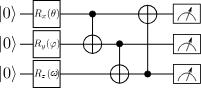

In [ ]:
# This creates a device with three wires on which PennyLane can run computations
dev = qml.device("default.qubit", wires=3)


def my_circuit(theta, phi, omega):

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT BY ADDING THE GATES

    # Here are two examples, so you can see the format:
    # qml.CNOT(wires=[0, 1])
    # qml.RX(theta, wires=0)
    qml.RX(theta,wires=0)
    qml.RY(phi,wires=1)
    qml.RZ(omega,wires=[2])
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,2])
    qml.CNOT(wires=[2,0])




    return qml.probs(wires=[0, 1, 2])

# This creates a QNode, binding the function and device
my_qnode = qml.QNode(my_circuit, dev)

# We set up some values for the input parameters
theta, phi, omega = 0.1, 0.2, 0.3

# Now we can execute the QNode by calling it like we would a regular function
my_qnode(theta, phi, omega)

tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

**Codercise I.2.3.** The quantum function below implements the circuit from the previous exercise. Apply a decorator to the quantum function to construct a QNode, then run it using the provided input parameters.

In [ ]:
# This creates a device with three wires on which PennyLane can run computations
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev) #automaticamente cria um Node utiliando a função do circuito logo abaixo
def my_circuit(theta, phi, omega):

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT BY ADDING THE GATES

    # Here are two examples, so you can see the format:
    # qml.CNOT(wires=[0, 1])
    # qml.RX(theta, wires=0)
    qml.RX(theta,wires=0)
    qml.RY(phi,wires=1)
    qml.RZ(omega,wires=[2])
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,2])
    qml.CNOT(wires=[2,0])




    return qml.probs(wires=[0, 1, 2])



# We set up some values for the input parameters
theta, phi, omega = 0.1, 0.2, 0.3

# Now we can execute the QNode by calling it like we would a regular function

my_circuit(theta, phi, omega)

tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

**Codercise I.2.4.** What is the depth of the circuit in the picture below? \\
A: 4  \\
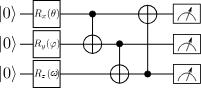

# Uso do `resource_calculator = qml.specs(my_circuit)`

In [ ]:



# This creates a device with three wires on which PennyLane can run computations
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev) #automaticamente cria um Node utiliando a função do circuito logo abaixo
def my_circuit(theta, phi, omega):

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT BY ADDING THE GATES

    # Here are two examples, so you can see the format:
    # qml.CNOT(wires=[0, 1])
    # qml.RX(theta, wires=0)
    qml.RX(theta,wires=0)
    qml.RY(phi,wires=1)
    qml.RZ(omega,wires=[2])
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,2])
    qml.CNOT(wires=[2,0])




    return qml.probs(wires=[0, 1, 2])

# This creates a QNode, binding the function and device
#my_qnode = qml.QNode(my_circuit, dev)

# We set up some values for the input parameters
theta, phi, omega = 0.1, 0.2, 0.3

# Now we can execute the QNode by calling it like we would a regular function

my_circuit(theta, phi, omega)

# resource_calculator will compute the resources of the QNode `my_qnode`
resource_calculator = qml.specs(my_circuit)

# we pass it the same parameters as the original QNode
theta, phi, omega = 0.1, 0.2, 0.3
print(resource_calculator(theta, phi, omega)['resources'])

wires: 3
gates: 6
depth: 4
shots: Shots(total=None)
gate_types:
{'RX': 1, 'RY': 1, 'RZ': 1, 'CNOT': 3}
gate_sizes:
{1: 3, 2: 3}


**Codercise I.3.1.** Complete the quantum function below to create a circuit that applies U to the qubit and returns its state. (Compare this to the earlier function apply_u that you wrote - isn't it nice to not have to worry about the matrix arithmetic?) \\

$$

In [ ]:
dev = qml.device("default.qubit", wires=1) #wires = 1 é a quantidade de fios

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

@qml.qnode(dev)
def apply_u(U):

    ##################
    # YOUR CODE HERE #
    ##################

    # USE QubitUnitary TO APPLY U TO THE QUBIT

    qml.QubitUnitary(U, wires=0)#wires = 0 é o índice do fio

    # Return the state
    return qml.state()


print(apply_u(U))
#obseserve que nossa porta unitária U é a mesma porta de Hadamard para o etado |0>

[0.70710678+0.j 0.70710678+0.j]


In [ ]:
#imprimindo como tensor
#O código acima está assumindo um qubi no estado |0>

apply_u(U)

tensor([0.70710678+0.j, 0.70710678+0.j], requires_grad=True)

**Codercise I.3.2.** Apply the `Rot` operation to a qubit using the input parameters. Then, complete the `QNode` to return the quantum state vector, using `qml.state()`.

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_u_as_rot(phi, theta, omega):

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY A ROT GATE USING THE PROVIDED INPUT PARAMETERS
    qml.Rot(phi, theta, omega, wires=0)

    # RETURN THE QUANTUM STATE VECTOR

    return qml.state()

In [ ]:
#O código acima está assumindo um qubi no estado |0>

apply_u_as_rot(0.2,0.3,0.4)

tensor([0.94460909-0.29220183j, 0.14869156+0.01491892j], requires_grad=True)

**Codercise I.4.1.** A common use of the $X$ gate is in initializing the state of a qubit at the beginning of an algorithm. Quite often, we would like our qubits to start in state $|0>$ (which is the default in PennyLane), however there are many cases where we instead would like to start from $|1>$. Complete the function below by using `qml.PauliX` to initialize the qubit's state to $|0>$ or $|1>$ based on an input flag. Then, use `qml.QubitUnitary` to apply the provided U.

In [ ]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

@qml.qnode(dev)
def varied_initial_state(state):
    """Complete the function such that we can apply the operation U to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    ##################
    # YOUR CODE HERE #
    ##################

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON THE state PARAMETER

    if state == 1:
      qml.PauliX(wires=0)

    # APPLY U TO THE STATE
    qml.QubitUnitary(U,wires=0)

    return qml.state()


state = 1

varied_initial_state(state)

tensor([ 0.70710678+0.j, -0.70710678+0.j], requires_grad=True)

**Codercise I.4.2.** What do you think is meant by uniform superposition? Let's explore this using PennyLane. Complete the quantum function below such that it:

1. applies a Hadamard gate to the qubit,
2. returns the state of the qubit with `qml.state`.

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_hadamard():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE HADAMARD GATE
    qml.Hadamard(wires=0)
    # RETURN THE STATE
    return qml.state()


apply_hadamard()

tensor([0.70710678+0.j, 0.70710678+0.j], requires_grad=True)

**Codercise I.4.3.** Combining your code from **codercises I.4.1**, and **I.4.2**, apply the Hadamard gate to both $|0>$ and $|1>$. What do the two different output states look like? Do you notice anything special about them?

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_hadamard_to_state(state):
    """Complete the function such that we can apply the Hadamard to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    ##################
    # YOUR CODE HERE #
    ##################

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON state
    if state == 1:
      qml.PauliX(wires=0)

    # APPLY THE HADAMARD
    qml.Hadamard(wires=0)

    # RETURN THE STATE

    return qml.state()

print(apply_hadamard_to_state(0))
print(apply_hadamard_to_state(1))

[0.70710678+0.j 0.70710678+0.j]
[ 0.70710678+0.j -0.70710678+0.j]


Codercise I.4.4. Now let's combine what we've just learned. Create a device with one qubit. Then, write a QNode (from scratch!) that applies the following circuit and returns the state.

image.png

\\

Determine its effect on the two basis states. What do you think this operation does? (We'll discuss this further in the next node).

The signature of your function should be:

```def apply_hxh(state):```
    ```...```
    ```return qml.state()```

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_hxh(state):

  if state == 1:
      qml.PauliX(wires=0)
  #applying H gate...
  qml.Hadamard(wires=0)
  #applying X gate...
  qml.PauliX(wires=0)
  #applying H gate...
  qml.Hadamard(wires=0)
  #applying a measurer...
  #qml.measure(0)

  return qml.state()


print(apply_hxh(0))
print(apply_hxh(1))

[1.+0.j 0.+0.j]
[ 0.+0.j -1.+0.j]


**Codercise I.5.1.** Write a QNode that applies qml.PauliZ to the  $|+>$ state and returns the state. What state is this? How do the measurement probabilities differ from those of $|+>$?

image.png

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_z_to_plus():
    """Write a circuit that applies PauliZ to the |+> state and returns
    the state.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE THE |+> STATE
    qml.Hadamard(wires=0)
    # APPLY PAULI Z
    qml.PauliZ(wires=0)
    # RETURN THE STATE
    return qml.state()

print(apply_z_to_plus())


[ 0.70710678+0.j -0.70710678+0.j]


**Codercise I.5.2.** Write a QNode that uses `qml.RZ` to simulate a `qml.PauliZ` operation and return the state. Apply it to the  $|+>$ state to check your work.



In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def fake_z():
    """Use RZ to produce the same action as Pauli Z on the |+> state.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE THE |+> STATE
    qml.Hadamard(wires=0)

    # APPLY RZ
    qml.RZ(np.pi,wires=0)

    # RETURN THE STATE
    return qml.state()

print(fake_z())

[4.32978028e-17-0.70710678j 4.32978028e-17+0.70710678j]


**Codercise I.5.3.** Adjoints in PennyLane can be computed by applying the `qml.adjoint` transform to an operation before specifying its parameters and wires. For example, \\

`qml.adjoint(qml.RZ)(phi, wires=0)` \\

performs the same computation as `qml.RZ(-phi, wires=0)`. Implement the circuit below, using adjoints when necessary, and return the quantum state.

image.png

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def many_rotations():
    """Implement the circuit depicted above and return the quantum state.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT
    qml.Hadamard(wires=0)
    qml.S(wires=0)
    qml.adjoint(qml.T)(wires=0)
    qml.RZ(0.3,wires=0)
    qml.adjoint(qml.S)(wires=0)
    # RETURN THE STATE

    return qml.state()

print(many_rotations())


[0.69916673-0.10566872j 0.56910461-0.41966647j]


Codercise I.5.4. The $T$ gate plays an important role in more advanced quantum computing topics; specifically, it is a required operation in some fault-tolerant frameworks. However, it is much more resource intensive to implement in those frameworks than other gates, and therefore a common task in quantum circuit design is minimization of the $T$-count and $T$-depth (i.e., the number of layers of depth in a circuit which contain a $T$/$T^{\dagger}$). Many such tools for optimizing quantum circuits are automated, however we can work out a simple example by hand. Suppose that we want to implement the following circuit:

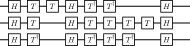

That's an awful lot of $T$s! Implement this same circuit in PennyLane as a QNode just_enough_ts, but minimize the number of  gates by replacing sequences of them with other gates that have the same effect. Using the gates you learned before, how much can you simplify this circuit?

Then, answer the following questions:

1) What are the original $T$-count, $T$-depth, and regular depth? \\
2) What is the optimal $T$-count? \\
3) What are the optimal depth and $T$-depth of the resulting circuit? \\

Record your answers in the variables provided in the code block below. Note: You can only use $S$,$T$ , and $H$ gates!

Tip. Recall that operations can be  applied to different qubits by specifying the desired index in the wires variable. Also, circuit depth is calculated as the maximum number of gates acting on any one wire.

In [ ]:
dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def too_many_ts():
    """You can implement the original circuit here as well, it may help you with
    testing to ensure that the circuits have the same effect.

    Returns:
        array[float]: The measurement outcome probabilities.
    """
    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.Hadamard(wires=0)
    qml.adjoint(qml.T)(wires=0)
    qml.adjoint(qml.T)(wires=0)
    qml.Hadamard(wires=0)

    qml.Hadamard(wires=1)
    qml.T(wires=1)
    qml.Hadamard(wires=1)
    qml.T(wires=1)
    qml.T(wires=1)
    qml.T(wires=1)
    qml.T(wires=1)
    qml.Hadamard(wires=1)

    qml.Hadamard(wires=2)
    qml.adjoint(qml.T)(wires=2)
    qml.Hadamard(wires=2)
    qml.adjoint(qml.T)(wires=2)
    qml.adjoint(qml.T)(wires=2)
    qml.adjoint(qml.T)(wires=2)
    qml.Hadamard(wires=2)

    return qml.probs(wires=[0, 1, 2])

@qml.qnode(dev)
def just_enough_ts():
    """Implement an equivalent circuit as the above with the minimum number of
    T and T^\dagger gates required.

    Returns:
        array[float]: The measurement outcome probabilities.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    # IMPLEMENT THE CIRCUIT, BUT COMBINE AND OPTIMIZE THE GATES
    # TO MINIMIZE THE NUMBER OF TS
    qml.Hadamard(wires=0)
    qml.S(wires=0)
    qml.Hadamard(wires=0)
    qml.adjoint(qml.S)(wires=0)
    qml.Hadamard(wires=0)


    qml.Hadamard(wires=1)
    qml.T(wires=1)
    qml.Hadamard(wires=1)
    qml.S(wires=1)
    qml.S(wires=1)
    qml.Hadamard(wires=1)

    qml.Hadamard(wires=2)
    qml.adjoint(qml.T)(wires=2)
    qml.Hadamard(wires=2)
    qml.adjoint(qml.S)(wires=2)
    qml.adjoint(qml.T)(wires=2)
    qml.Hadamard(wires=2)

    return qml.probs(wires=[0, 1, 2])

##################
# YOUR CODE HERE #
##################
print(too_many_ts())
print(just_enough_ts())
# FILL IN THE CORRECT VALUES FOR THE ORIGINAL CIRCUIT
original_depth = 8
original_t_count = 13
original_t_depth = 6

# FILL IN THE CORRECT VALUES FOR THE NEW, OPTIMIZED CIRCUIT
optimal_depth = 6
optimal_t_count = 3
optimal_t_depth = 2


[1.15555797e-33 3.85185989e-34 1.15555797e-33 3.85185989e-34
 3.75000000e-01 1.25000000e-01 3.75000000e-01 1.25000000e-01]
[0.    0.    0.    0.    0.375 0.125 0.375 0.125]


#I.6 From a different angle

Codercise I.6.1. Write a `QNode` that applies `qml.RX` with an angle of  to one of the computational basis states. What operation is this?

In [ ]:
dev = qml.device('default.qubit',wires=1)

@qml.qnode(dev)
def apply_rx_pi(state):
    """Apply an RX gate with an angle of \pi to a particular basis state.

    Args:
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RX(pi) AND RETURN THE STATE
    qml.RX(np.pi,wires=0)

    return qml.state()

print(apply_rx_pi(0))
print(apply_rx_pi(1))


[6.123234e-17+0.j 0.000000e+00-1.j]
[0.000000e+00-1.j 6.123234e-17+0.j]


**Codercise I.6.2.** The matrix representation of  is \\
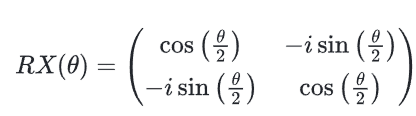

How does this affect the amplitudes when we apply it to a quantum state? Implement a QNode that applies the qml.RX operation with parameter $\theta$ to a specified basis state. Then, run the code to plot the amplitudes  of the  $|0>$ and  $|1>$ and  after applying $RX(\theta)$ to the |0> state.

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


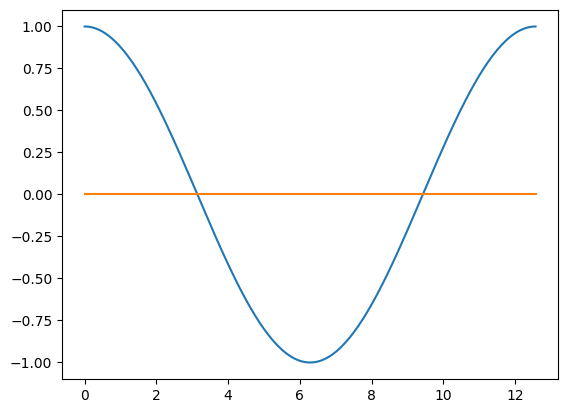

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def apply_rx(theta, state):
    """Apply an RX gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RX(theta) AND RETURN THE STATE
    qml.RX(theta,wires=0)
    return qml.state()

# Code for plotting
angles = np.linspace(0, 4*np.pi, 200)
output_states = np.array([apply_rx(t, 0) for t in angles])

#print(output_states)

plt.plot(angles,output_states)
plt.show()

#plot = plotter(angles, output_states)


**Codercise I.6.3.** Repeat the above exercise, but using `qml.RY`. From the amplitudes you obtain for , can you start deducing the matrix form of? \\

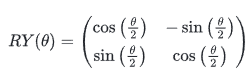

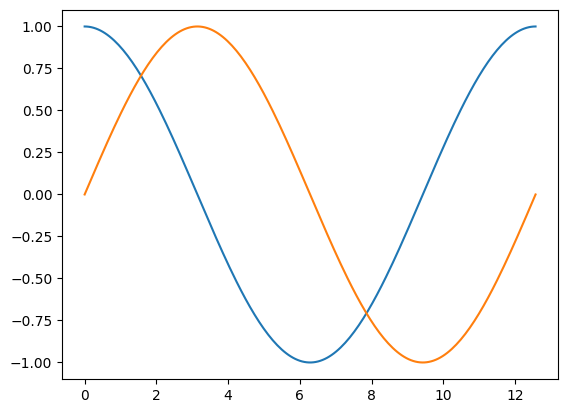

In [ ]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def apply_ry(theta, state):
    """Apply an RY gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################


    # APPLY RY(theta) AND RETURN THE STATE
    qml.RY(theta,wires=0)
    return qml.state()


# Code for plotting
angles = np.linspace(0, 4*np.pi, 200)
output_states = np.array([apply_ry(t, 0) for t in angles])

plt.plot(angles,output_states)
plt.show()


Link para Esfera de Bloch:   https://www.st-andrews.ac.uk/physics/quvis/simulations_html5/sims/blochsphere/blochsphere.html

# I.7 Universal gate sets

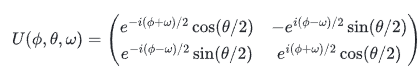

**Codercise I.7.1** Can you find a set of angles phi, theta, omega such that the sequence of gates

    

```
qml.RZ(phi, wires=0)
qml.RX(theta, wires=0)
qml.RZ(omega, wires=0)
```


acts the same as a Hadamard gate (up to a global phase)?



In [ ]:
dev = qml.device("default.qubit", wires=1)

##################
# YOUR CODE HERE #
##################

# ADJUST THE VALUES OF PHI, THETA, AND OMEGA
phi, theta, omega = np.pi/2, np.pi/2, np.pi/2

@qml.qnode(dev)
def hadamard_with_rz_rx():
    qml.RZ(phi, wires=0)
    qml.RX(theta, wires=0)
    qml.RZ(omega, wires=0)
    return qml.state()

alpha = complex(hadamard_with_rz_rx()[0])
beta = complex(hadamard_with_rz_rx()[1])

print(alpha,beta)

print(alpha*alpha.conjugate())
print(beta*beta.conjugate())
print(alpha*alpha.conjugate() + beta*beta.conjugate())
#Obs: A menos de uma fase: |alpha|^2 + |beta|^2 = 1

(1.1102230246251565e-16-0.7071067811865476j) -0.7071067811865475j
(0.5000000000000001+0j)
(0.4999999999999999+0j)
(1+0j)


**Codercise I.7.2.** Using the results of the previous exercise, rewrite the following circuit over the gate `set [RZ, RX]` (recall that it is okay for your circuit to work up to a global phase). What is the minimum number of such gates needed to do so? \\

image.png

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def convert_to_rz_rx():
    ##################
    # YOUR CODE HERE #
    ##################
    qml.RZ(phi, wires=0)
    qml.RX(theta, wires=0)
    qml.RZ(omega, wires=0)
    qml.RZ(np.pi/2, wires=0)
    qml.RZ(np.pi/4, wires=0)



    # IMPLEMENT THE CIRCUIT IN THE PICTURE USING ONLY RZ AND RX


    return qml.state()

# I.8 Prepare yourself

**Codercise I.8.1.** Write a circuit that prepares the quantum state

up to a global phase using as few gates as possible.

$|\psi>=\frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}} e^{i\frac{5\pi}{4}}|1>$


In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE
    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)

    return qml.state()


print(prepare_state())

[ 0.70710678+0.j  -0.5       -0.5j]


**Codercise I.8.2.** Let's try another. Write a circuit that prepares the quantum state \\

$|\psi>=\frac{\sqrt{3}}{2}|0> - \frac{i}{2}|1>$ \\

up to a global phase using as few gates as possible.

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE
    qml.RX(np.pi/3,wires=0)


    return qml.state()

print(prepare_state())

[0.8660254+0.j  0.       -0.5j]


**Codercise I.8.3.** Write a QNode that uses qml.StatePrep to prepare the state

Return the state of system. In addition, we'll print the circuit using qml.draw to investigate which operations were actually used under the hood.



In [ ]:
v = np.array([0.52889389-0.14956775j, 0.67262317+0.49545818j])

##################
# YOUR CODE HERE #
##################

# CREATE A DEVICE
dev = qml.device("default.qubit", wires=1)

# CONSTRUCT A QNODE THAT USES qml.StatePrep
# TO PREPARE A QUBIT IN STATE V, AND RETURN THE STATE

@qml.qnode(dev)
def prepare_state(state=v):
    qml.StatePrep(v,wires=0)
    return qml.state()

# This will draw the quantum circuit and allow you to inspect the output gates
print(prepare_state(v))
print()
print(qml.draw(prepare_state, expansion_strategy='device')(v))

[0.52889389-0.14956775j 0.67262317+0.49545818j]

0: ──|Ψ⟩─┤  State


# I.10 What did you expect?

Codercise I.10.1. Design and run a PennyLane circuit that performs the following, where $<Y>$ indicates measurement of the PauliY observable. \\

image.png



In [ ]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def circuit():
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT IN THE PICTURE AND MEASURE PAULI Y
    qml.RX(np.pi/4,wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)
    return qml.expval(qml.PauliY(wires=0))

print(circuit())

-0.7071067811865471


In [ ]:
import numpy as np
from scipy.stats import kruskal

# Dados de exemplo
grupo1 = [4.0, 5.0, 2.0, 1.0, 2.0, 5.0, 4.0, 3.0, 1.0, 5.0, 4.0, 5.0, 5.0, 4.0, 1.0, 5.0, 1.0, 5.0, 5.0, 3.0, 3.0, 5.0, 3.0, 3.0, 5.0, 5.0, 1.0, 1.0, 3.0, 4.0, 4.0, 5.0, 3.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 3.0, 3.0, 3.0, 3.0, 5.0, 5.0, 5.0, 5.0, 1.0, 2.0, 5.0, 3.0, 3.0, 2.0, 5.0, 3.0, 5.0, 5.0, 3.0, 3.0, 5.0, 3.0, 4.0, 5.0, 4.0, 1.0, 5.0, 5.0, 4.0, 5.0, 3.0, 3.0, 4.0, 5.0, 1.0, 3.0, 5.0, 1.0, 4.0, 5.0, 3.0, 4.0, 3.0, 5.0, 3.0, 5.0, 5.0, 3.0, 5.0, 4.0, 5.0, 5.0, 5.0, 1.0, 5.0, 2.0, 5.0, 2.0, 5.0, 1.0, 3.0, 3.0, 5.0, 5.0, 4.0, 4.0, 3.0, 1.0, 1.0, 2.0, 2.0, 5.0, 3.0, 3.0, 5.0, 5.0, 5.0, 3.0, 4.0, 4.0, 2.0, 5.0, 4.0, 5.0, 4.0, 5.0, 5.0, 4.0, 4.0, 3.0, 3.0, 5.0, 5.0, 5.0, 5.0, 3.0, 5.0, 4.0, 1.0, 1.0, 5.0, 1.0, 5.0, 1.0, 4.0, 1.0, 4.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 5.0, 3.0, 3.0, 4.0, 5.0, 5.0, 5.0, 4.0, 2.0, 5.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 5.0, 5.0, 5.0, 1.0, 5.0, 2.0, 5.0, 5.0, 5.0, 5.0, 2.0, 3.0, 2.0, 1.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0, 5.0, 3.0, 4.0, 3.0, 4.0, 2.0, 3.0, 4.0, 5.0, 1.0, 5.0, 3.0, 5.0, 5.0, 5.0, 2.0, 2.0, 3.0, 2.0, 4.0, 2.0, 4.0, 3.0, 3.0]
grupo2 = [1, 2, 3, 4, 5]
grupo3 = [3, 3, 3, 3, 3]

# Calcular as medianas
mediana1 = np.median(grupo1)
mediana2 = np.median(grupo2)
mediana3 = np.median(grupo3)

print(f"Mediana do Grupo 1: {mediana1}")
print(f"Mediana do Grupo 2: {mediana2}")
print(f"Mediana do Grupo 3: {mediana3}")

# Executar o teste de Kruskal-Wallis
stat, p_value = kruskal(grupo1, grupo2, grupo3)
print(f"Estatística H: {stat}")
print(f"Valor-p: {p_value}")

# Verificar se o resultado é significativo
if p_value < 0.05:
    print("O teste é significativo (p < 0,05)")
else:
    print("O teste não é significativo (p >= 0,05)")



Mediana do Grupo 1: 4.0
Mediana do Grupo 2: 3.0
Mediana do Grupo 3: 3.0
Estatística H: 2.02620206098701
Valor-p: 0.36309127483664794
O teste não é significativo (p >= 0,05)


In [ ]:


def oracle_matrix(combo):
    """Return the oracle matrix for a secret combination.

    Args:
        combo (list[int]): A list of bits representing a secret combination.

    Returns:
        array[float]: The matrix representation of the oracle.
    """
    index = np.ravel_multi_index(combo, [2]*len(combo)) # Index of solution

    my_array = np.identity(2**len(combo)) # Create the identity matrix

    ##################
    # YOUR CODE HERE #
    ##################

    for i in range(len(my_array)):
      for j in range(len(my_array)):
        if i == index and j == index:
          my_array[i][j] = -1




    # MODIFY DIAGONAL ENTRY CORRESPONDING TO SOLUTION INDEX

    return my_array


print(oracle_matrix([0,0,0]))

[[-1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]]


[0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625
 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625]


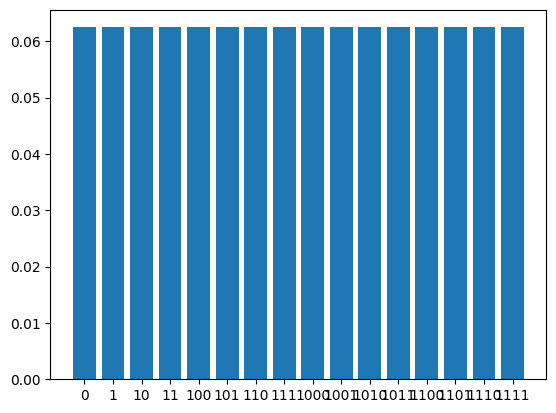

In [ ]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def oracle_circuit(combo):
    """Create a uniform superposition, apply the oracle, and return probabilities.

    Args:
        combo (list[int]): A list of bits representing a secret combination.

    Returns:
        list[float]: The output probabilities.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    for i in range(n_bits):
        qml.Hadamard(wires=i)

    qml.QubitUnitary(oracle_matrix(combo), wires=range(n_bits))

    return qml.probs(wires=range(n_bits))

combo = [0,1,1,0]
print(oracle_circuit(combo))

x = [str(bin(x))[2:] for x in range(2**n_bits)]

plt.bar(x,oracle_circuit(combo))
plt.show()

In [ ]:
A = np.array([[1,0]])
B = np.array([[1,0]])

np.tensordot(A, B, axes=0)

tensor([[[[1, 0]],

         [[0, 0]]]], requires_grad=True)

In [ ]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

def oracle_matrix(s):

  i = np.identity(2**len(s))
  inv = -i + 2*np.ones((2**len(s),2**len(s)))*1/(2**len(s))

  print(inv)



@qml.qnode(dev)
def oracle_circuit(ent):


    ##################
    # YOUR CODE HERE #
    ##################
    for i in range(n_bits):
        qml.Hadamard(wires=i)

    qml.QubitUnitary(oracle_matrix(ent), wires=range(n_bits))

    return qml.probs(wires=range(n_bits))


ent = [0,1,1]
print(oracle_circuit(ent))

x = [str(bin(x))[2:] for x in range(2**n_bits)]

plt.bar(x,oracle_circuit(ent))
plt.show()

NameError: name 'qml' is not defined

In [ ]:
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits,shots=100)

@qml.qnode(dev)
def circuit(n_qubits):

    for i in range(n_qubits):
        qml.Hadamard(wires=i)

    return qml.probs(wires=range(n_qubits))


circuit(n_qubits)

x = [str(bin(x))[2:] for x in range(2**n_qubits)]

plt.bar(x,circuit(n_qubits))
plt.title("Distribuição de medidas")
plt.show()

print(x)
print(circuit(n_qubits))
print(max(circuit(n_qubits)))

NameError: name 'qml' is not defined

In [ ]:

def gerador_quantico(n_qb,shots):

  n_qubits = n_qb
  dev = qml.device("default.qubit", wires=n_qubits,shots=shots)

  @qml.qnode(dev)
  def circuit(n_qubits):

      for i in range(n_qubits):
          qml.Hadamard(wires=i)

      return qml.probs(wires=range(n_qubits))


  circuit(n_qubits)

  x = [str(bin(x))[2:] for x in range(2**n_qubits)]

  #plt.bar(x,circuit(n_qubits))
  #plt.title("Distribuição de medidas")
  #plt.show()

  saida = circuit(n_qubits)
  posicoes = np.where(saida == max(saida) )
  #print(f"posicoes: {posicoes[0][0]}")

  dec = int(x[posicoes[0][0]], 2)
  #print(f"Maxima probabilidade: {max(saida)}   valor:{x[posicoes[0][0]]}  valor decimal: {dec}")

  return dec

In [ ]:
def is_prime(number): #verifica se o numero é primo
  if number < 2:
    return False
  for i in range(2, int(number ** 0.5) + 1):
    if number % i == 0:
      return False
  return True


n_qb = 8
shots = 100
qrn = []
for i in range(100):
  q = gerador_quantico(n_qb,shots)
  if is_prime(q):
    qrn.append(q)


print(qrn)

[113, 151, 43, 73, 7, 41, 191, 7, 5, 3, 137, 17, 17, 167, 7, 223, 17, 139, 2, 89, 131, 2, 13, 109, 29, 71, 41, 131]


#algoritmo RSA

In [ ]:
import random

def gcd(a, b):
    while b != 0:
        a, b = b, a % b
    return a

def mod_inv(a, m):
    m0, x0, x1 = m, 0, 1
    while a > 1:
        q = a // m
        m, a = a % m, m
        x0, x1 = x1 - q * x0, x0
    return x1 + m0 if x1 < 0 else x1

def is_prime(num):
    if num < 2:
        return False
    for i in range(2, int(num ** 0.5) + 1):
        if num % i == 0:
            return False
    return True

def generate_keypair(p, q):
    n = p * q
    phi = (p - 1) * (q - 1)

    print(f"phi:{phi}")

    # gerar o numero aleatorio quantico neste trecho
    e = random.randrange(1, phi)
    while gcd(e, phi) != 1:
        e = random.randrange(1, phi)

    d = mod_inv(e, phi)
    return ((e, n), (d, n))

def encrypt(pk, plaintext):
    e, n = pk
    cipher = [pow(ord(char), e, n) for char in plaintext]
    return cipher

def decrypt(pk, ciphertext):
    d, n = pk
    plain = [chr(pow(char, d, n)) for char in ciphertext]
    return ''.join(plain)

# Exemplo de uso
p = qrn[0]
q = qrn[1]
public_key, private_key = generate_keypair(p, q)

message = "Testando o uso de um gerador de número aleatório quântico no RSA!"
encrypted_message = encrypt(public_key, message)
decrypted_message = decrypt(private_key, encrypted_message)

print("public key: ",public_key)
print("private key: ",private_key)
print('Mensagem original:', message)
print('Mensagem criptografada:', ''.join(map(lambda x: str(x), encrypted_message)))
print('Mensagem descriptografada:', decrypted_message)


phi:16800
public key:  (15611, 17063)
private key:  (4691, 17063)
Mensagem original: Testando o uso de um gerador de número aleatório quântico no RSA!
Mensagem criptografada: 10090312711134847894329617772940420294042094961112940420177731274209496768042016493127463478941777294046344201777312742032966480768031274634294042078943074312778943484718946343511294042013334949672323296348435111221829404203296294042019088219821410538
Mensagem descriptografada: Testando o uso de um gerador de número aleatório quântico no RSA!
